In [22]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score, roc_curve, auc
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [23]:
def mapping(x):
    if x=='good':
        return 1
    elif x == 'bad':
        return 0
    else:
        return -1

ion = pd.read_csv('Ionosphere.csv', na_values='?')
ion['Class1'] = ion.Class.apply(mapping)
ion.Class1.factorize()[0]
ion.info()
ion.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 37 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  351 non-null    int64  
 1   V1          351 non-null    int64  
 2   V2          351 non-null    int64  
 3   V3          351 non-null    float64
 4   V4          351 non-null    float64
 5   V5          351 non-null    float64
 6   V6          351 non-null    float64
 7   V7          351 non-null    float64
 8   V8          351 non-null    float64
 9   V9          351 non-null    float64
 10  V10         351 non-null    float64
 11  V11         351 non-null    float64
 12  V12         351 non-null    float64
 13  V13         351 non-null    float64
 14  V14         351 non-null    float64
 15  V15         351 non-null    float64
 16  V16         351 non-null    float64
 17  V17         351 non-null    float64
 18  V18         351 non-null    float64
 19  V19         351 non-null    f

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V27,V28,V29,V30,V31,V32,V33,V34,Class,Class1
0,1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,...,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good,1
1,2,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,...,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad,0
2,3,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,...,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,good,1
3,4,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,...,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,bad,0
4,5,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,...,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,good,1


In [24]:
ion_train, ion_test = train_test_split(ion, test_size=0.3, random_state=42)
est = smf.logit('Class1 ~ V6 + V7 + V8 + V9 + V10 + V11 + V12', ion_train).fit()
est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.448957
         Iterations 6


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,-1.570879,0.346329,-4.535805,5.738427e-06,-2.249671,-0.892087
V6,-0.002950,0.400974,-0.007358,9.941290e-01,-0.788845,0.782944
V7,2.376640,0.458402,5.184616,2.164601e-07,1.478188,3.275092
V8,2.164808,0.434343,4.984103,6.225002e-07,1.313512,3.016104
V9,1.575580,0.520582,3.026573,2.473433e-03,0.555258,2.595903
V10,0.341267,0.411712,0.828897,4.071628e-01,-0.465674,1.148207
V11,-0.159818,0.438339,-0.364600,7.154099e-01,-1.018946,0.699310
V12,0.235630,0.405169,0.581559,5.608636e-01,-0.558487,1.029746


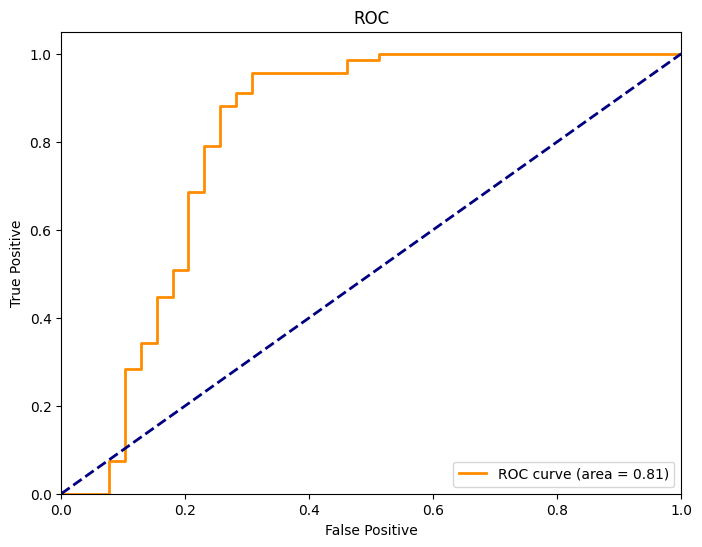

In [27]:
ion_test['predicted_prob'] = est.predict(ion_test)
fpr, tpr, thresholds = roc_curve(ion_test['Class1'], ion_test['predicted_prob'])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color = 'darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0,1], [0,1], color = 'navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()



In [40]:
X = ion[['V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12']].to_numpy()
y = ion.Class1.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

lda = LinearDiscriminantAnalysis(solver='svd')
y_pred = lda.fit(X_train, y_train).predict(X_test)

df_ = pd.DataFrame({'True class': y_test,
                    'Predicted class': y_pred})
df_.replace(to_replace={0:'Bad', 1:'Good'}, inplace=True)

df_.groupby(['Predicted class', 'True class']).size().unstack('True class')

True class,Bad,Good
Predicted class,,
Bad,20,3
Good,12,53


In [42]:
print(classification_report(y_test, y_pred, target_names=['Bad', 'Good']))

              precision    recall  f1-score   support

         Bad       0.87      0.62      0.73        32
        Good       0.82      0.95      0.88        56

    accuracy                           0.83        88
   macro avg       0.84      0.79      0.80        88
weighted avg       0.84      0.83      0.82        88



In [44]:
df = pd.read_csv('Smarket.csv')
X = df[['Lag3', 'Lag5']].to_numpy()
y = df.Direction.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [45]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
pred = knn.fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, pred, digits=3))

              precision    recall  f1-score   support

        Down      0.522     0.455     0.486       132
          Up      0.467     0.534     0.498       118

    accuracy                          0.492       250
   macro avg      0.494     0.494     0.492       250
weighted avg      0.496     0.492     0.492       250

